In [1]:
import torch
import numpy as np

import matplotlib.pyplot as plt
import pickle as pkl

import os
import random
import shutil

from PIL import Image
from torchvision.datasets import MNIST

In [2]:
# !pip install matplotlib
# !pip install opencv-python

In [3]:
plt.rcParams['image.cmap'] = 'Blues_r'

## Save to Training Format

In [6]:
num_samples = 10
data_dir = './gans_data/data_dg'
MAX_DIGITS = 5

with open('./data/MNIST_sep/num_per_class.pkl', 'rb') as f:
    num_per_class = pkl.load(f)
    
# create directory to save training data
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [7]:
# # delete existing data
# shutil.rmtree(data_dir)

In [8]:
def create_YOLO_sample(sample):
    """
    sample: string of digits to create the sample
        - ex. 194
    returns numpy image and lists for classes and box annotations
    """
    
    images = []
    classes = []
    annotations = []
    for idx, digit in enumerate(sample):
        if digit == '_':
            images.append(np.zeros((28, 28)))
            continue
        
        image_to_stitch_idx = random.randint(0, num_per_class[int(digit)] - 1)
        with open(f'./data/MNIST_sep/{digit}/{image_to_stitch_idx}.pkl', 'rb') as f:
            image_to_stitch = pkl.load(f)
        images.append(image_to_stitch)
        
        digit_class = float(digit)
        x_coord = (idx + 0.5) / len(sample)
        y_coord = 0.5
        width = 0.9 / len(sample)
        height = 0.9
        
        classes.append((digit_class))
        annotations.append((x_coord, y_coord, width, height))
    
    image_np = np.concatenate(images, axis=1)
    
    return image_np, classes, annotations

In [9]:
# generate and save YOLO data and annotations

image_list = []
classes_list = []
annotations_list = []

for sample_num in range(num_samples):
    sample = str(random.randint(1, int('9' * MAX_DIGITS)))
    
    # insert blanks randomly to front and back of sample to get same size samples
    while len(sample) < MAX_DIGITS:
        # use '_' to denote a blank
        sample = '_' + sample if random.uniform(0, 1) < 0.5 else sample + '_'
    
    image_np, classes, annotations = create_YOLO_sample(sample)
    
    image_list.append(torch.tensor(image_np).unsqueeze(0).double())
    classes_list.append(torch.tensor(classes).double())
    annotations_list.append(torch.tensor(annotations).double())

In [10]:
print(len(image_list))
print(image_list[0].shape)

10
torch.Size([1, 28, 140])


In [11]:
print(len(classes_list))
print(classes_list[0].shape)

10
torch.Size([5])


In [12]:
print(len(annotations_list))
print(annotations_list[0].shape)

10
torch.Size([5, 4])


In [13]:
with open(f'{data_dir}/image_list', 'wb+') as f:
    pkl.dump(image_list, f)
    
with open(f'{data_dir}/classes_list', 'wb+') as f:
    pkl.dump(classes_list, f)
    
with open(f'{data_dir}/annotations_list', 'wb+') as f:
    pkl.dump(annotations_list, f)

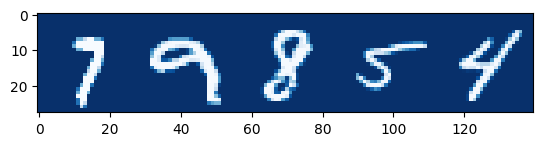

In [14]:
plt.imshow(np.moveaxis(np.array(image_list[0]), 0, 2))